# Loading DATA

In [19]:
%%capture
from mp1 import generate_dataset_classification 
import sys
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import keras
import keras.utils
from keras import utils as np_utils

In [20]:
reset_selective name_variable X_train y_train

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [21]:
%%capture
[X_train, y_train] = generate_dataset_classification(300, 20, True)


#Reformating the Desired Input
X_train = X_train.reshape(X_train.shape[0],1, 72, 72)
X_train /= 255


#Reformating the Desired Output
Y_train = np_utils.to_categorical(y_train, 3)

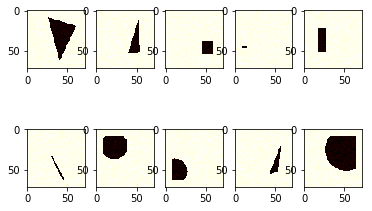

In [22]:
#visualizing images

im = X_train.reshape(X_train.shape[0], 72, 72) 
f, mat = plt.subplots(2,5)
mat[0,0].imshow(im[0],cmap=cm.afmhot)
mat[0,1].imshow(im[1],cmap=cm.afmhot)
mat[0,2].imshow(im[2],cmap=cm.afmhot)
mat[0,3].imshow(im[3],cmap=cm.afmhot)
mat[0,4].imshow(im[4],cmap=cm.afmhot)
mat[1,0].imshow(im[5],cmap=cm.afmhot)
mat[1,1].imshow(im[6],cmap=cm.afmhot)
mat[1,2].imshow(im[7],cmap=cm.afmhot)
mat[1,3].imshow(im[8],cmap=cm.afmhot)
mat[1,4].imshow(im[9],cmap=cm.afmhot)

# Defining the keras model

In [23]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D 

#Defining the model

model2 = Sequential() 
model2.add(Conv2D(16, (5, 5), activation='relu', input_shape=(1,72,72), data_format='channels_first'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())

model2.add(Dense(3, activation='softmax'))

# Optimization

In [24]:
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
model2.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
300/300 [==============================] - 1s 4ms/step - loss: 1.0988 - acc: 0.3233
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 1.0955 - acc: 0.3733
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 1.0920 - acc: 0.3733
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 1.0936 - acc: 0.3733
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 1.0945 - acc: 0.4867
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 1.0903 - acc: 0.4133
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 1.0853 - acc: 0.3733
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 1.0838 - acc: 0.3733
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 1.0753 - acc: 0.3733
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 1.0714 - acc: 0.3733


# Testing 

In [25]:
from mp1 import generate_test_set_classification 
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [26]:
X_test = X_test.reshape(X_test.shape[0],1, 72, 72)
X_test /= 255
Y_test = np_utils.to_categorical(y_train, 3) 
model2.evaluate(X_test, Y_test)

300/300 [==============================] - 1s 3ms/step


[1.097208210627238, 0.3733333334326744]

==> The learning error is 1.09 and accuracy = 37%